In [31]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('student_habits_performance.csv')
df.head()

student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                   Master          Average   
1         Good                   6              High School          Average   
2         Poor                   1              High School             Poor   
3         Poor                   4                   Master             Good   
4         Fair                   3                   Master             Good   

   mental_health_rating extracurricular_participation  exam_score  
0                     8                           Yes        56.2  
1                     8                            No       100.0  
2                     1                            No        34.3  
3                     1                           Yes        26.8  
4                     1                            No        66.4

In [3]:
df.shape

(1000, 16)

In [4]:
column = df.columns
print(f'columns : {column}')

columns : Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')


In [5]:
df.describe()

age  study_hours_per_day  social_media_hours  netflix_hours  \
count  1000.0000           1000.00000         1000.000000    1000.000000   
mean     20.4980              3.55010            2.505500       1.819700   
std       2.3081              1.46889            1.172422       1.075118   
min      17.0000              0.00000            0.000000       0.000000   
25%      18.7500              2.60000            1.700000       1.000000   
50%      20.0000              3.50000            2.500000       1.800000   
75%      23.0000              4.50000            3.300000       2.525000   
max      24.0000              8.30000            7.200000       5.400000   

       attendance_percentage  sleep_hours  exercise_frequency  \
count            1000.000000  1000.000000         1000.000000   
mean               84.131700     6.470100            3.042000   
std                 9.399246     1.226377            2.025423   
min                56.000000     3.200000            0.000000   
25%                78.000000     5.600000            1.000000   
50%                84.400000     6.500000            3.000000   
75%                91.025000     7.300000            5.000000   
max               100.000000    10.000000            6.000000   

       mental_health_rating   exam_score  
count           1000.000000  1000.000000  
mean               5.438000    69.601500  
std                2.847501    16.888564  
min                1.000000    18.400000  
25%                3.000000    58.475000  
50%                5.000000    70.500000  
75%                8.000000    81.325000  
max               10.000000   100.000000

In [6]:
#Search for missing data
for i in range(len(column)):
    print(f"{column[i]}: {df[column[i]].isnull().sum()}")


student_id: 0
age: 0
gender: 0
study_hours_per_day: 0
social_media_hours: 0
netflix_hours: 0
part_time_job: 0
attendance_percentage: 0
sleep_hours: 0
diet_quality: 0
exercise_frequency: 0
parental_education_level: 91
internet_quality: 0
mental_health_rating: 0
extracurricular_participation: 0
exam_score: 0


In [7]:
#Data type of features
for i in range(len(column)):
    print(f"{column[i]}: {df[column[i]].dtype}")

student_id: object
age: int64
gender: object
study_hours_per_day: float64
social_media_hours: float64
netflix_hours: float64
part_time_job: object
attendance_percentage: float64
sleep_hours: float64
diet_quality: object
exercise_frequency: int64
parental_education_level: object
internet_quality: object
mental_health_rating: int64
extracurricular_participation: object
exam_score: float64


In [8]:
for i in range(len(column)):
    print(f"{column[i]}: {df[column[i]].nunique()}")

student_id: 1000
age: 8
gender: 3
study_hours_per_day: 78
social_media_hours: 60
netflix_hours: 51
part_time_job: 2
attendance_percentage: 320
sleep_hours: 68
diet_quality: 3
exercise_frequency: 7
parental_education_level: 3
internet_quality: 3
mental_health_rating: 10
extracurricular_participation: 2
exam_score: 480


In [9]:
for i in range(len(column)):
    name = column[i]
    print(f"{column[i]}: {pd.api.types.is_numeric_dtype(df[name])}")

student_id: False
age: True
gender: False
study_hours_per_day: True
social_media_hours: True
netflix_hours: True
part_time_job: False
attendance_percentage: True
sleep_hours: True
diet_quality: False
exercise_frequency: True
parental_education_level: False
internet_quality: False
mental_health_rating: True
extracurricular_participation: False
exam_score: True


In [10]:
for col in column:
    if pd.api.types.is_numeric_dtype(df[col]) == True and col != "exam_score":
        print(f"corr of {col} = {df.exam_score.corr(df[col])}")

corr of age = -0.00890687186398476
corr of study_hours_per_day = 0.825418509396044
corr of social_media_hours = -0.1667328851086167
corr of netflix_hours = -0.17177923845531573
corr of attendance_percentage = 0.0898356017699274
corr of sleep_hours = 0.12168291063767982
corr of exercise_frequency = 0.16010746437908213
corr of mental_health_rating = 0.32152293065514614


In [11]:
#create dataframe of correlation and P-value 
corr_df = pd.DataFrame(columns =["corr","P_value"])
for col in column:
    if pd.api.types.is_numeric_dtype(df[col]) == True and col != "exam_score":
        corr,P_value = stats.pearsonr(df.exam_score,df[col])
        corr_df.loc[col] = [round(corr,3),round(P_value,3)]


In [12]:
corr_df

corr  P_value
age                   -0.009    0.778
study_hours_per_day    0.825    0.000
social_media_hours    -0.167    0.000
netflix_hours         -0.172    0.000
attendance_percentage  0.090    0.004
sleep_hours            0.122    0.000
exercise_frequency     0.160    0.000
mental_health_rating   0.322    0.000

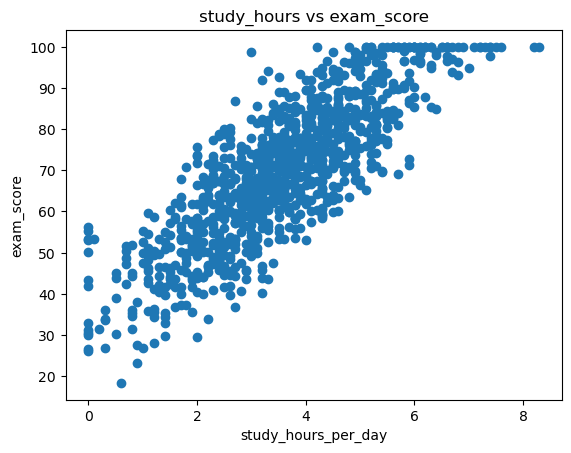

In [13]:
plt.scatter(df.study_hours_per_day,df.exam_score)
plt.title('study_hours vs exam_score')
plt.xlabel('study_hours_per_day')
plt.ylabel('exam_score')
plt.show()

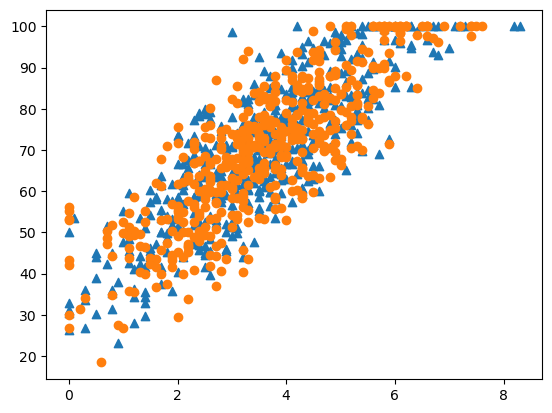

In [14]:
df_male = df[df['gender'] == 'Male']
df_female = df[df['gender'] == 'Female']
plt.scatter(df_male.study_hours_per_day,df_male.exam_score,marker='^')
plt.scatter(df_female.study_hours_per_day,df_female.exam_score)
plt.show()

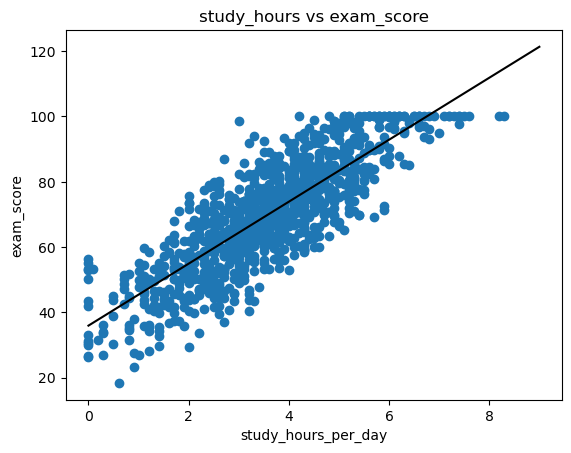

In [15]:
# y = mx + b
# y = slope(x) + intercept
m,b,corr_value,p_value,error = stats.linregress(df.study_hours_per_day,df.exam_score)
x = range(0,9 + 1)
y = m*x + b

plt.plot(x,y,color="black")
plt.scatter(df.study_hours_per_day,df.exam_score)
plt.title('study_hours vs exam_score')
plt.xlabel('study_hours_per_day')
plt.ylabel('exam_score')
plt.show()

In [16]:
#heteroscedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.formula.api import ols

# Fit the OLS model
model = ols(formula='exam_score~study_hours_per_day', data=df).fit()

white_test = het_white(model.resid,  model.model.exog)
bp_test = het_breuschpagan(model.resid, model.model.exog)

output_df = pd.DataFrame(columns=['LM stat', 'LM p-value', 'F-stat', 'F p-value'])
output_df.loc['White'] = white_test
output_df.loc['Breusch-Pagan'] = bp_test

output_df.round(3)

LM stat  LM p-value  F-stat  F p-value
White            8.418       0.015   4.232      0.015
Breusch-Pagan    6.699       0.010   6.731      0.010

if all values are significant we can assume that we have heteroscedasticity and vise-versa , here we have 2 significant value wich mean there is a little but it's okay

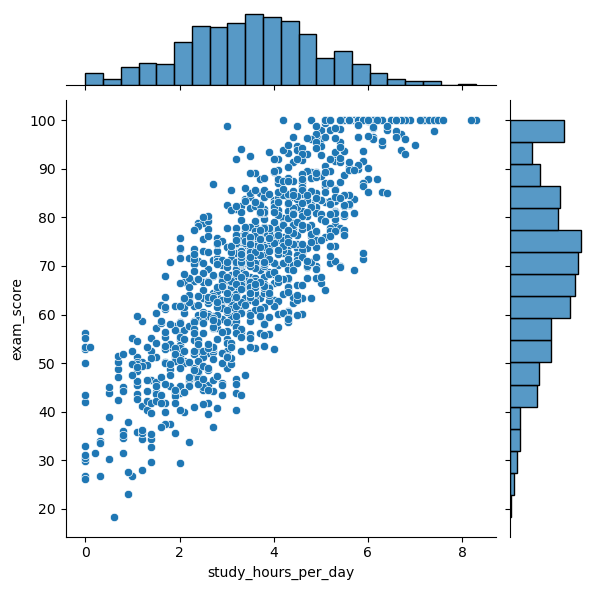

In [17]:
sns.jointplot(x='study_hours_per_day',y='exam_score',data=df);

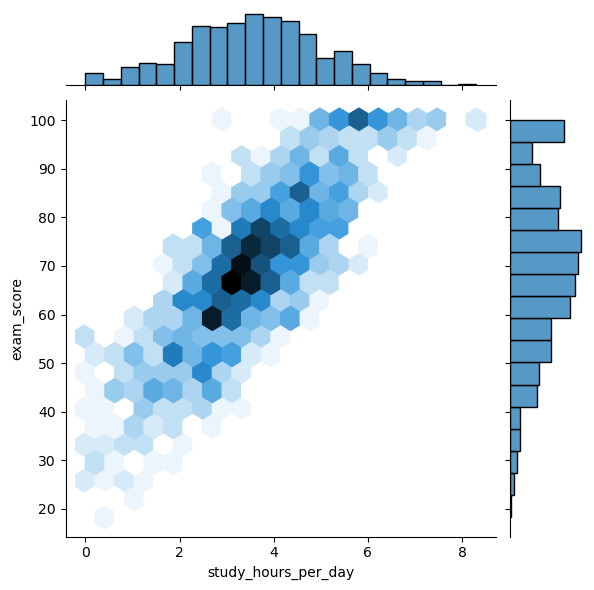

In [18]:
sns.jointplot(x='study_hours_per_day',y='exam_score',data=df,kind='hex');

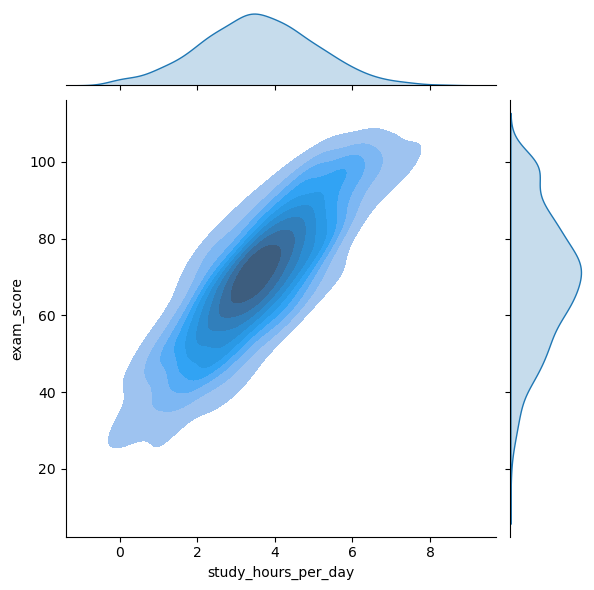

In [19]:
sns.jointplot(x='study_hours_per_day',y='exam_score',data=df,kind='kde',fill=True);

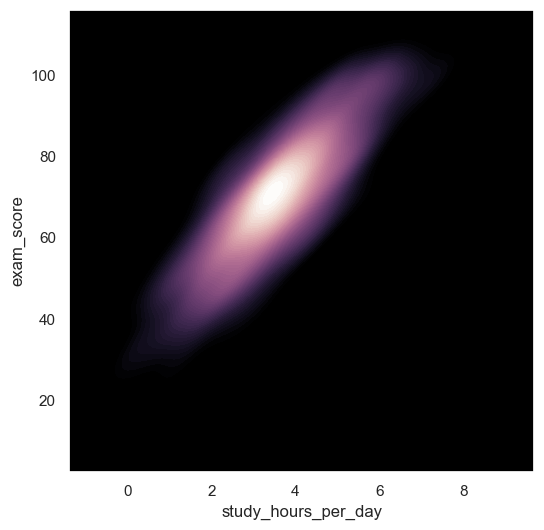

In [20]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'white', 'axes.grid':False})
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(x='study_hours_per_day', y='exam_score', data=df, cmap=cmap, n_levels=60, fill=True);

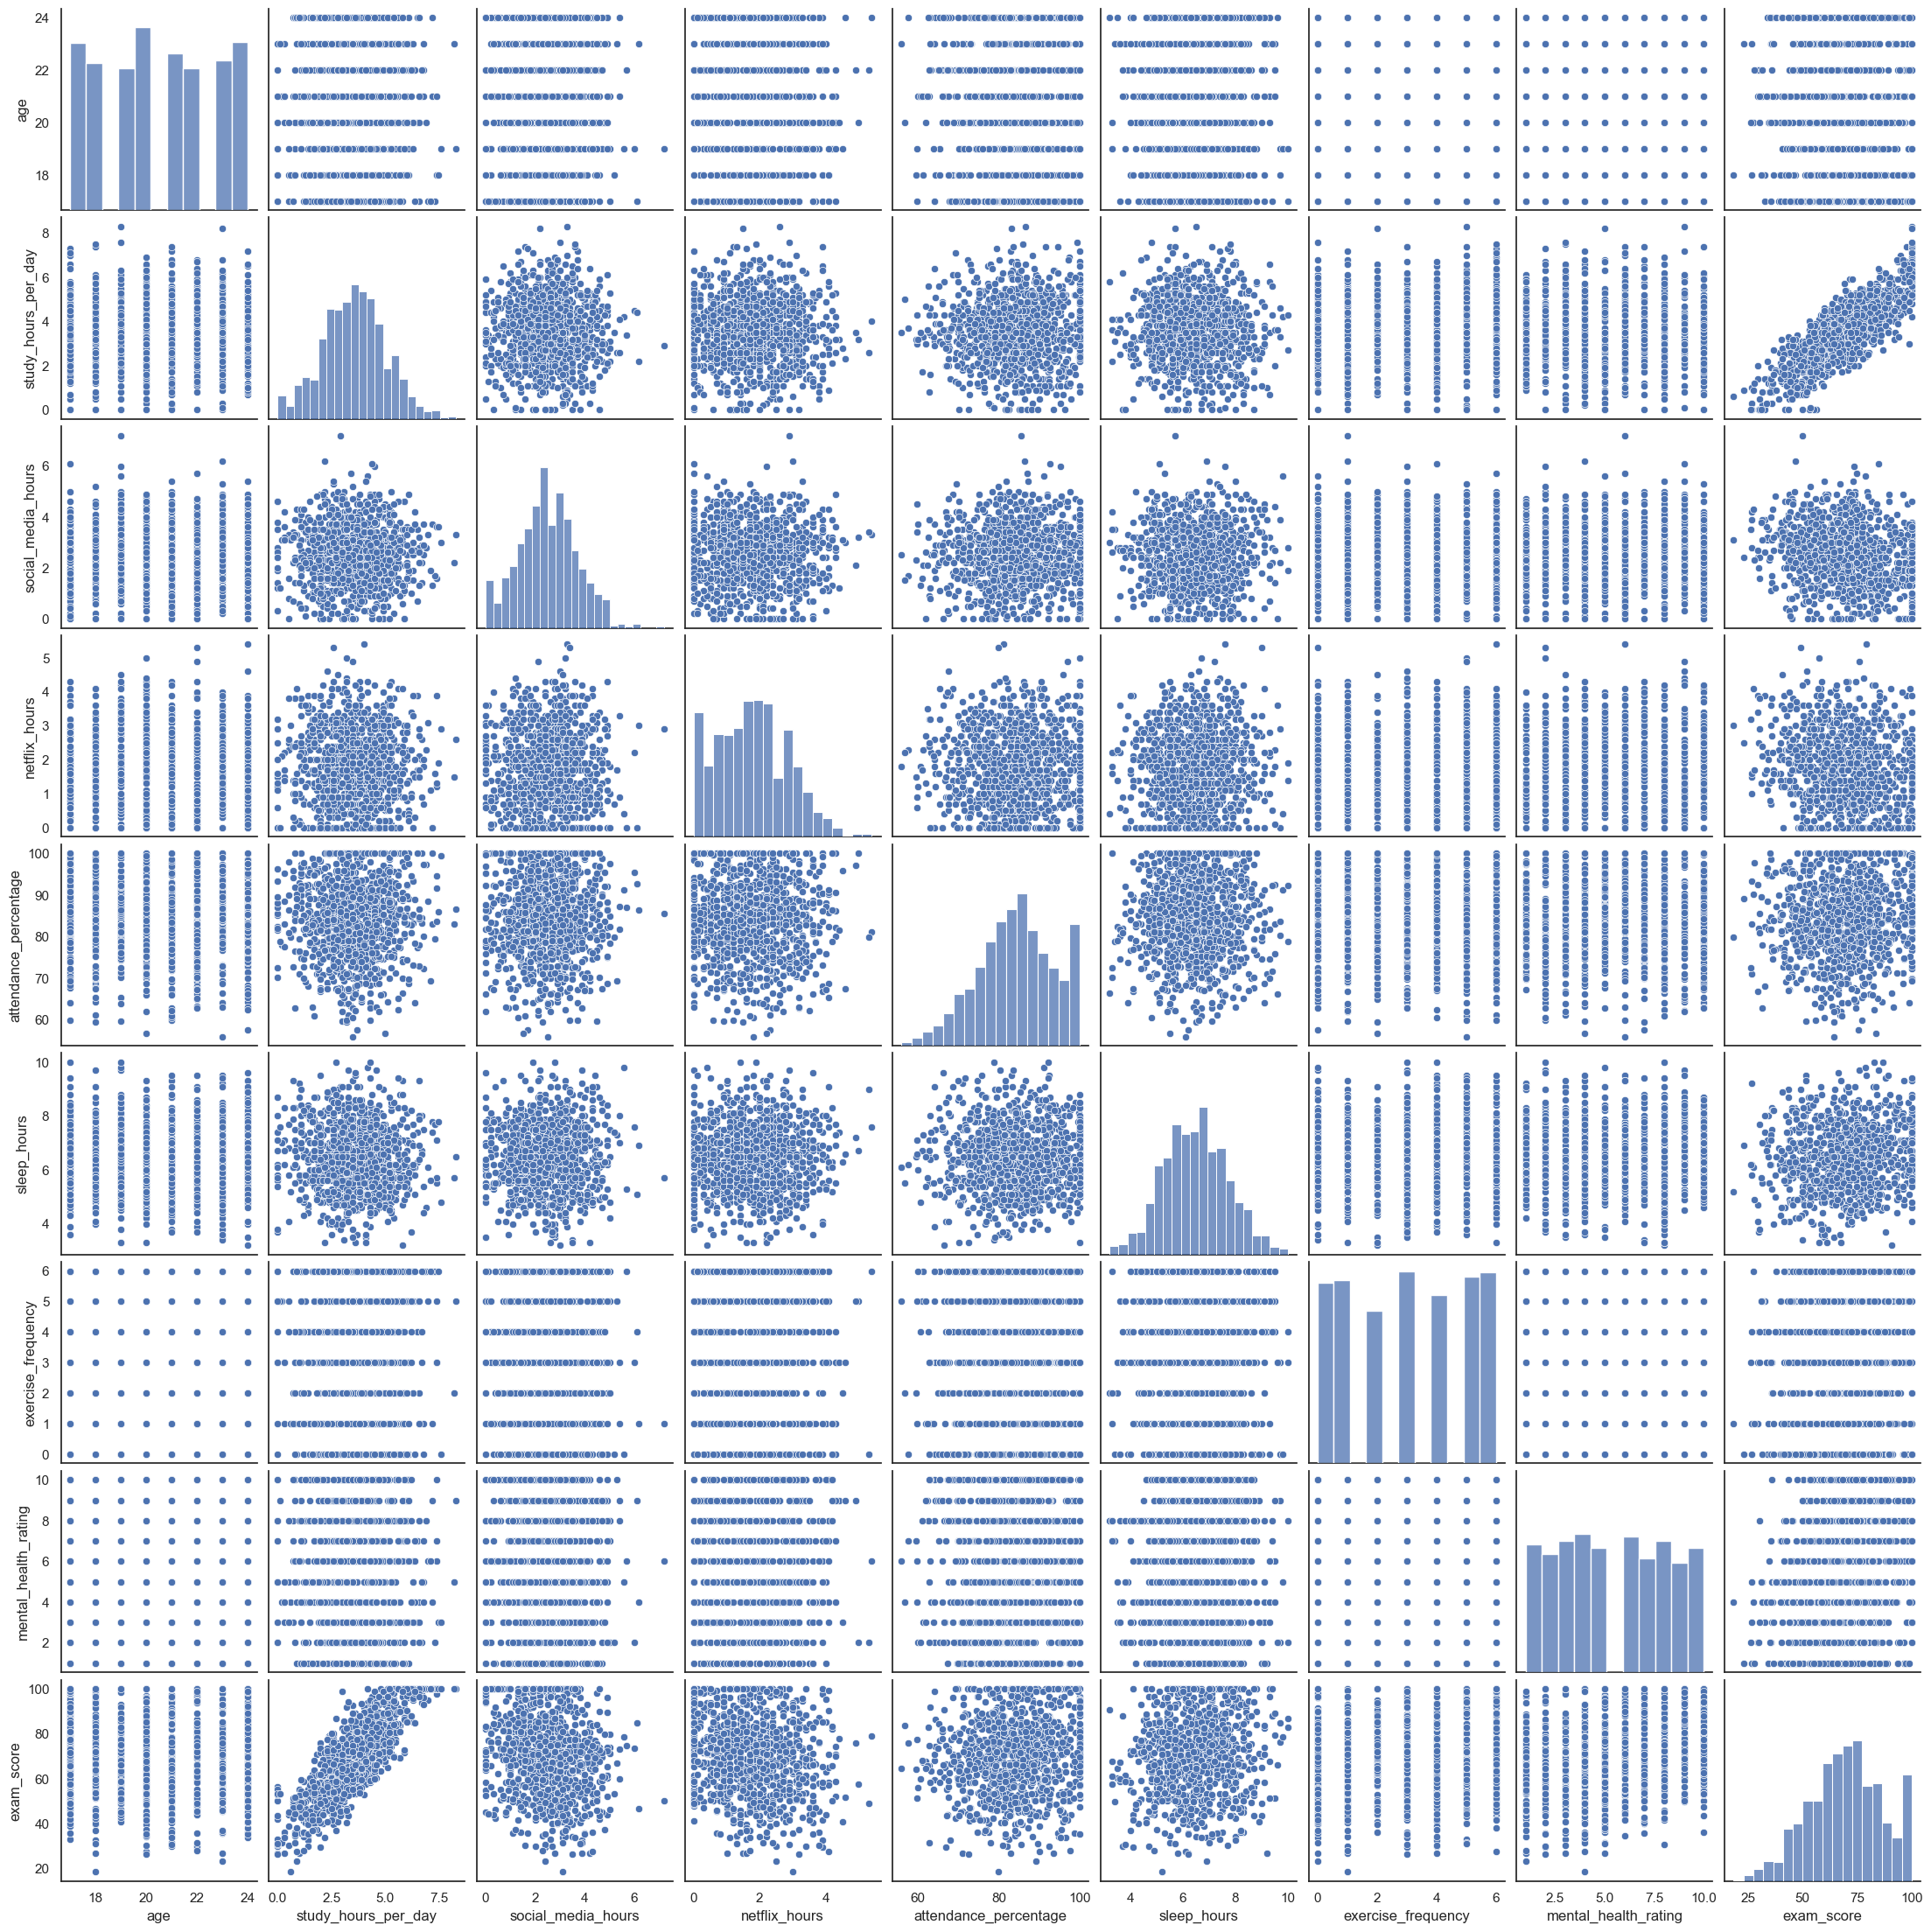

In [21]:
#plot all numeric features
sns.set_style('white')
sns.pairplot(df)

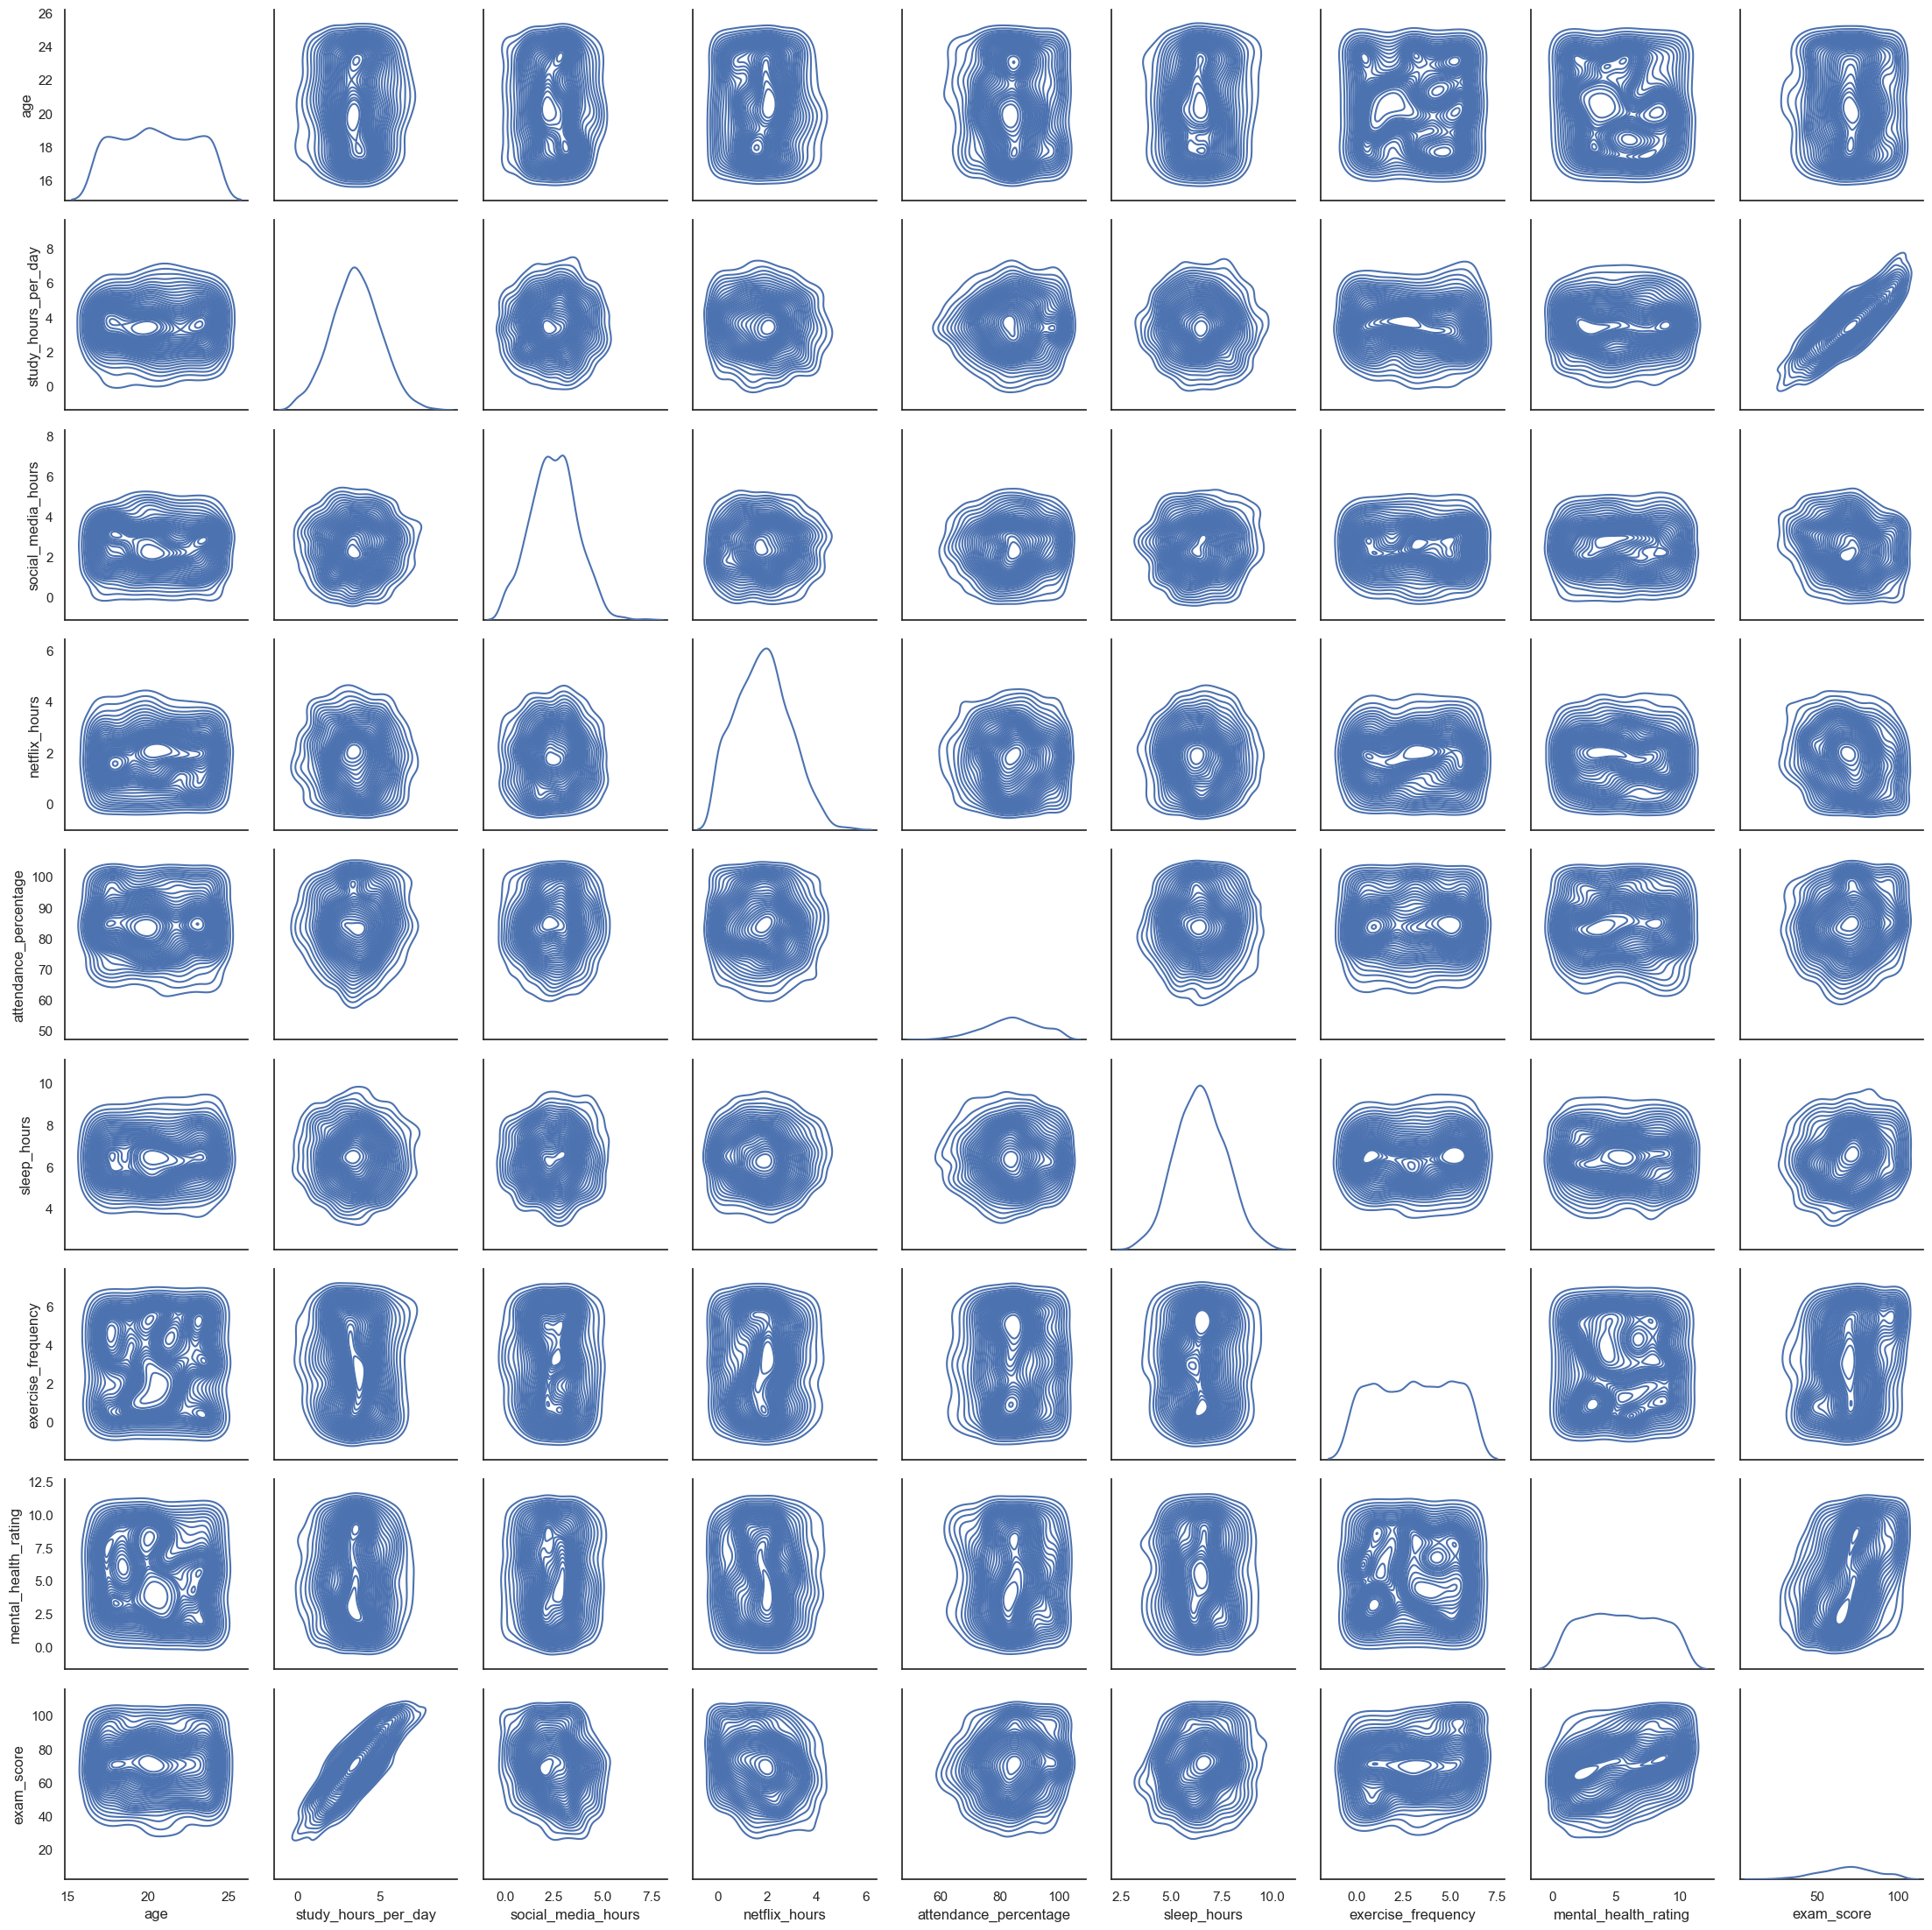

In [22]:
g = sns.PairGrid(df)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=30);

<Axes: xlabel='exam_score', ylabel='Count'>

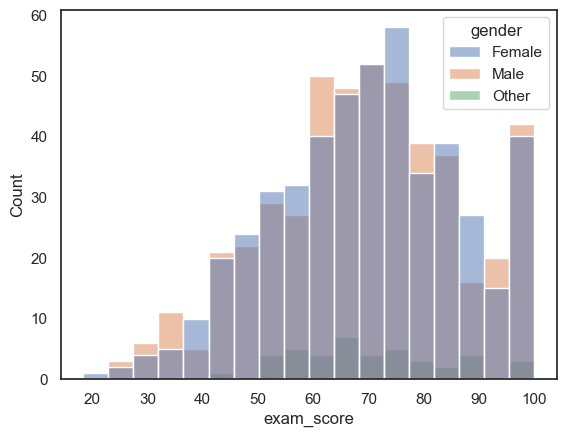

In [40]:
sns.histplot(data=df,x='exam_score',hue='gender')

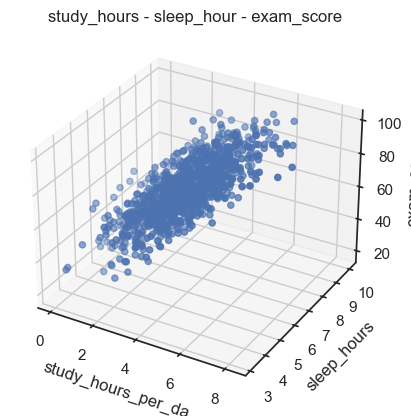

In [23]:
#2D visualisation of a 3D Plot 

ax = plt.figure().add_subplot(projection='3d')
ax.scatter(df['study_hours_per_day'], df['sleep_hours'], df['exam_score'])

ax.set_title('study_hours - sleep_hour - exam_score')
ax.set_xlabel('study_hours_per_da')
ax.set_ylabel('sleep_hours')
ax.set_zlabel('exam_score')

plt.show()

In [26]:
# Plotly is a better Library for data visualisation

import plotly.express as px

fig = px.scatter_3d(df, x='study_hours_per_day', y='sleep_hours', z='exam_score',color='part_time_job',symbol='extracurricular_participation')
fig.show()

In [27]:
fig = px.scatter_3d(df, x='netflix_hours', y='social_media_hours', z='exam_score',color='part_time_job',symbol='extracurricular_participation')
fig.show()

In [48]:
# Split exam_score by group
scores_yes = df.loc[df['part_time_job'] == 'Yes', 'exam_score']
scores_no  = df.loc[df['part_time_job'] == 'No',  'exam_score']

# Run independent t-test
t, p = stats.ttest_ind(scores_yes, scores_no)

#we choose 0.05 as our level for p-value to be acceptable
print("t-statistic:", t)
print("p-value:", p)

t-statistic: -0.8408893908348427
p-value: 0.4006113244264293


In [51]:
#Another way of splitting categorical feature
scores_yes = df[df['extracurricular_participation'] == 'Yes']
scores_no  = df[df['extracurricular_participation'] == 'No']

# Run independent t-test
t, p = stats.ttest_ind(scores_yes['exam_score'], scores_no['exam_score'])

#we choose 0.05 as our level for p-value to be acceptable
print("t-statistic:", t)
print("p-value:", p)

t-statistic: 0.02782137289883962
p-value: 0.9778101815863728


In [ ]:
#create a function for splitting and t-testing
def t_test(feature,label):
    groups = df[feature].unique()
    scores_yes = df[df[feature] == groups[0]]
    scores_no  = df[df[feature] == groups[1]]

    # Run independent t-test
    t, p = stats.ttest_ind(scores_yes[label], scores_no[label])
    return t,p

t,p = t_test('extracurricular_participation','exam_score')
print("t-statistic:", t)
print("p-value:", p)    


t-statistic: 0.02782137289883962
p-value: 0.9778101815863728


In [66]:
#create a function for One-way Anova (takes 3 or more groups)
def Anova(feature,label):
    groups = df[feature].unique()
    group_values = []
    for group in groups :
        group_values.append(df[df[feature]==group][label])

    # Run independent t-test
    return stats.f_oneway(*group_values) #dynamically put list of values inside the function

print(f"Gender : {Anova('gender','exam_score')}")
print(f"Diet_quality : {Anova('diet_quality','exam_score')}")
print(f"Internet_quality :{Anova('internet_quality','exam_score')}")

Gender : F_onewayResult(statistic=0.1422825683289215, pvalue=0.8673937379445218)
Diet_quality : F_onewayResult(statistic=1.2662049986695567, pvalue=0.28235232253240805)
Internet_quality :F_onewayResult(statistic=1.4630112114998204, pvalue=0.2320346510834057)
